In [135]:
import pandas as pd
data_excel = pd.read_excel( 'data/DATA_excel.xlsx')
acute_toxicity_csv=pd.read_csv('data/Acute Toxicity_mouse_intraperitoneal_LD50.csv')


In [136]:
merged_data = pd.merge(data_excel, acute_toxicity_csv[['SMILES', 'TAID']], on='SMILES', how='left')
column_order = ['TAID'] + [col for col in merged_data.columns if col != 'TAID']
merged_data = merged_data[column_order]
merged_data.head()

,TAID,SMILES,Rings,O,N,Halogens,S,P,Other Metal,Existing forms of Rings,Hydroxyl or Ether,"Ketones, aldehydes, carboxylic acids, or esters",Existing forms of N,Which Halogens,Which Other Metal,mouse intraperitoneal LD50
0,TOX-145,Oc1ccc(O)cc1,1,1,0,0,0,0,0,Aromatic,1,0,NaN,NaN,NaN,3.041835
1,TOX-245,S=P(N1CC1)(N1CC1)N1CC1,1,0,1,0,1,1,0,Aliphatic,0,0,Tertiary Amine or Amide Nitrogen,NaN,NaN,4.235584
2,TOX-1273,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,1,0,0,1,0,0,0,Aliphatic,0,0,NaN,Cl,NaN,3.366732
3,TOX-1279,CN(C)C(=N)N=C(N)N,0,0,1,0,0,0,0,NaN,0,0,"Primary Amine or Ammonium Ion, Secondary Amine...",NaN,NaN,2.641604
4,TOX-1282,Cc1ccc(C(C)C)cc1O,1,1,0,0,0,0,0,Aromatic,1,0,NaN,NaN,NaN,3.311627


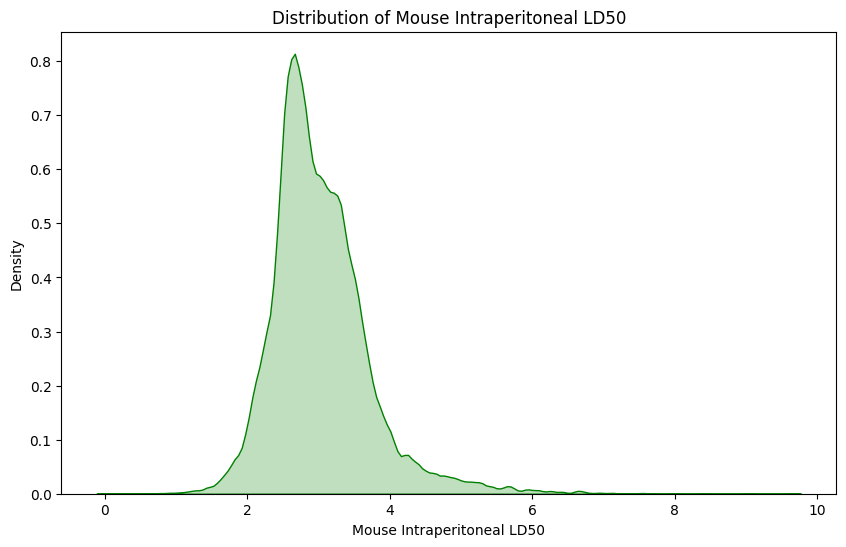

In [137]:
# Classification analyze:
# determine the the how many groups and what is the threshold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon

# task 1:
# Visualize the distribution of 'mouse intraperitoneal LD50' values:
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_data['mouse intraperitoneal LD50'], color="green",fill=True, bw_adjust=0.5)
plt.xlabel('Mouse Intraperitoneal LD50')
plt.ylabel('Density')
plt.title('Distribution of Mouse Intraperitoneal LD50')
plt.show()

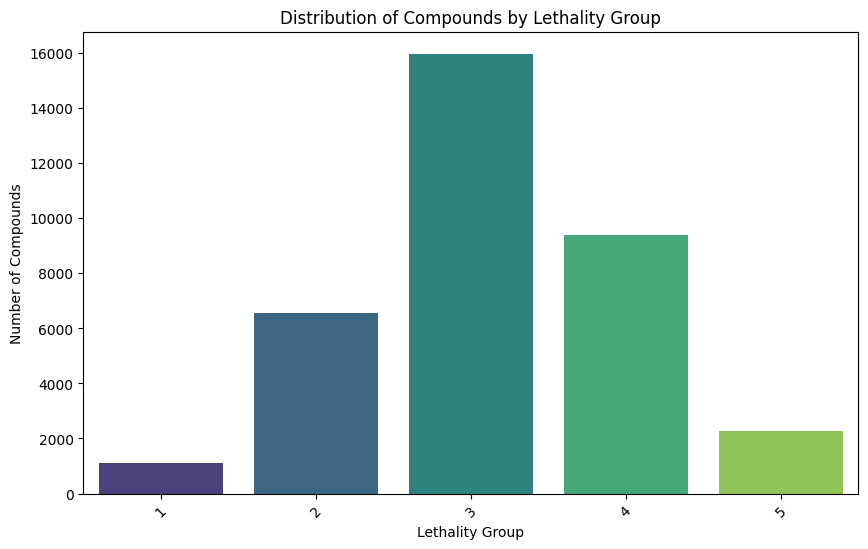

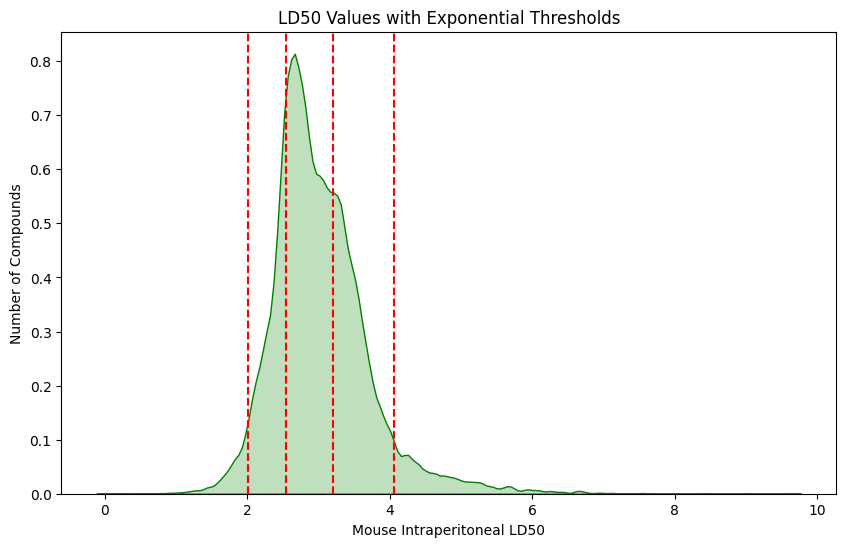

In [138]:
# We can see there is a high converge in between 2-4,
# Let's try to classify the data into 5 group following the natural e^x distribution by setting two edge case (e^0.7=2, e^1.4=4)
# Define the thresholds based on natural exponential function e raised to powers of internal range
thresholds_exp = [np.exp(0.7), np.exp(4/3 * 0.7),np.exp(5/3 * 0.7),np.exp(1.4)]
group_labels = ['1','2','3','4','5']

# Categorize the data into groups based on these thresholds
def categorize_data(value, thresholds):
    for i, threshold in enumerate(thresholds):
        if value <= threshold:
            return group_labels[i]
    return group_labels[-1]

# Apply the categorization to the data
merged_data['group'] = merged_data['mouse intraperitoneal LD50'].apply(lambda x: categorize_data(x, thresholds_exp))

# Plot the distribution of categorized groups
plt.figure(figsize=(10, 6))
group_counts = merged_data['group'].value_counts().reindex(group_labels)
sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")
plt.xlabel('Lethality Group')
plt.ylabel('Number of Compounds')
plt.title('Distribution of Compounds by Lethality Group')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of 'mouse intraperitoneal LD50' values with the thresholds
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_data['mouse intraperitoneal LD50'], color="green",fill=True, bw_adjust=0.5)
for threshold in thresholds_exp:
    plt.axvline(x=threshold, color='red', linestyle='--')
plt.xlabel('Mouse Intraperitoneal LD50')
plt.ylabel('Number of Compounds')
plt.title('LD50 Values with Exponential Thresholds')
plt.show()



In [139]:
merged_data.head()
#we can see there is some natural classification in Existing form of Rings and Extisting form of N, so we can do further classification

,TAID,SMILES,Rings,O,N,Halogens,S,P,Other Metal,Existing forms of Rings,Hydroxyl or Ether,"Ketones, aldehydes, carboxylic acids, or esters",Existing forms of N,Which Halogens,Which Other Metal,mouse intraperitoneal LD50,group
0,TOX-145,Oc1ccc(O)cc1,1,1,0,0,0,0,0,Aromatic,1,0,NaN,NaN,NaN,3.041835,3
1,TOX-245,S=P(N1CC1)(N1CC1)N1CC1,1,0,1,0,1,1,0,Aliphatic,0,0,Tertiary Amine or Amide Nitrogen,NaN,NaN,4.235584,5
2,TOX-1273,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,1,0,0,1,0,0,0,Aliphatic,0,0,NaN,Cl,NaN,3.366732,4
3,TOX-1279,CN(C)C(=N)N=C(N)N,0,0,1,0,0,0,0,NaN,0,0,"Primary Amine or Ammonium Ion, Secondary Amine...",NaN,NaN,2.641604,3
4,TOX-1282,Cc1ccc(C(C)C)cc1O,1,1,0,0,0,0,0,Aromatic,1,0,NaN,NaN,NaN,3.311627,4


In [140]:
# Further processing:
# Existing forms of N:
# Primary Amine or Ammonium Ion
# Tertiary Amine or Amide Nitrogen
# Secondary Amine or Aromatic Nitrogen
# Define the nitrogen forms
# Filter out rows where 'Existing forms of N' is NaN (not a number)

data=merged_data
nitrogen_forms = {
    'Primary Amine or Ammonium Ion': 'Primary Amine or Ammonium Ion',
    'Secondary Amine or Aromatic Nitrogen': 'Secondary Amine or Aromatic Nitrogen',
    'Tertiary Amine or Amide Nitrogen': 'Tertiary Amine or Amide Nitrogen'
}

# Initialize the new columns with zeros for all rows in the dataframe
for key in nitrogen_forms.keys():
    data[key] = 0

# Now update these columns with 1s where the conditions are met
for index, row in data.iterrows():
    if pd.notna(row['Existing forms of N']):
        forms_of_n = row['Existing forms of N'].split(', ')
        for form in forms_of_n:
            if form in nitrogen_forms:
                data.at[index, form] = 1

unique_ring_forms = data['Existing forms of Rings'].unique()

ring_categories = set()
for item in unique_ring_forms:
    if pd.notna(item):  # Check if the item is not NaN
        split_items = item.split(', ')
        ring_categories.update(split_items)  # Use update to add items to the set

# Initialize new columns for each unique category with zeros
for category in ring_categories:
    data[category] = 0

# Update these columns with 1s where the conditions are met
for index, row in data.iterrows():
    if pd.notna(row['Existing forms of Rings']):
        categories_in_row = row['Existing forms of Rings'].split(', ')
        for category in categories_in_row:
            if category in ring_categories:
                data.at[index, category] = 1

# Since CL is the most components in our Halogens, we can replace it to 0, and replace NaN to -1 and other to 1
data['Halogens'] = data['Which Halogens'].apply(lambda x: 0 if str(x).lower() == 'cl' 
                                                      else -1 if pd.isna(x) or str(x) == '' 
                                                      else 1)
data.head()

,TAID,SMILES,Rings,O,N,Halogens,S,P,Other Metal,Existing forms of Rings,...,Which Halogens,Which Other Metal,mouse intraperitoneal LD50,group,Primary Amine or Ammonium Ion,Secondary Amine or Aromatic Nitrogen,Tertiary Amine or Amide Nitrogen,Partially Aromatic,Aromatic,Aliphatic
0,TOX-145,Oc1ccc(O)cc1,1,1,0,-1,0,0,0,Aromatic,...,NaN,NaN,3.041835,3,0,0,0,0,1,0
1,TOX-245,S=P(N1CC1)(N1CC1)N1CC1,1,0,1,-1,1,1,0,Aliphatic,...,NaN,NaN,4.235584,5,0,0,1,0,0,1
2,TOX-1273,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,1,0,0,0,0,0,0,Aliphatic,...,Cl,NaN,3.366732,4,0,0,0,0,0,1
3,TOX-1279,CN(C)C(=N)N=C(N)N,0,0,1,-1,0,0,0,NaN,...,NaN,NaN,2.641604,3,1,1,1,0,0,0
4,TOX-1282,Cc1ccc(C(C)C)cc1O,1,1,0,-1,0,0,0,Aromatic,...,NaN,NaN,3.311627,4,0,0,0,0,1,0


In [121]:

# # Defining the conditions for the new "metal" column
# conditions = [
#     (data['P'] == 0) & (data['Other Metal'] == 0),  # All are 0
#     (data['P'] == 1) | (data['Other Metal'] == 1)                     # P and Other Metal are 1
# ]

# # Values to assign based on the conditions
# values = [0, 1]

# # Default value for cases that don't match any condition
# default_value = -1

# # Creating the "metal" column
# data['metal'] = np.select(conditions, values, default_value)
# data['Other Metal']=data['metal']
# # Display the updated dataframe
# data.head()



,TAID,SMILES,Rings,O,N,Halogens,S,P,Other Metal,Existing forms of Rings,...,Which Other Metal,mouse intraperitoneal LD50,group,Primary Amine or Ammonium Ion,Secondary Amine or Aromatic Nitrogen,Tertiary Amine or Amide Nitrogen,Partially Aromatic,Aromatic,Aliphatic,metal
0,TOX-145,Oc1ccc(O)cc1,1,1,0,-1,0,0,0,Aromatic,...,NaN,3.041835,3,0,0,0,0,1,0,0
1,TOX-245,S=P(N1CC1)(N1CC1)N1CC1,1,0,1,-1,1,1,1,Aliphatic,...,NaN,4.235584,5,0,0,1,0,0,1,1
2,TOX-1273,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,1,0,0,0,0,0,0,Aliphatic,...,NaN,3.366732,4,0,0,0,0,0,1,0
3,TOX-1279,CN(C)C(=N)N=C(N)N,0,0,1,-1,0,0,0,NaN,...,NaN,2.641604,3,1,1,1,0,0,0,0
4,TOX-1282,Cc1ccc(C(C)C)cc1O,1,1,0,-1,0,0,0,Aromatic,...,NaN,3.311627,4,0,0,0,0,1,0,0


In [142]:
data_new=data
cols = list(data.columns)


# Remove 'mouse intraperitoneal LD50' and 'group' from the list
cols.remove('mouse intraperitoneal LD50')
cols.remove('group')
cols.remove('Which Other Metal')
cols.remove('Existing forms of Rings')
cols.remove('Which Halogens')
cols.remove('Existing forms of N')
# cols.remove('Other Metal')
cols.remove('Rings')
# cols.remove('P')
cols.remove('O')
cols = cols + [ 'mouse intraperitoneal LD50','group']

# Reindex the DataFrame with the new column order
data_new = data_new[cols]
data_new.head()


,TAID,SMILES,N,Halogens,S,P,Other Metal,Hydroxyl or Ether,"Ketones, aldehydes, carboxylic acids, or esters",Primary Amine or Ammonium Ion,Secondary Amine or Aromatic Nitrogen,Tertiary Amine or Amide Nitrogen,Partially Aromatic,Aromatic,Aliphatic,mouse intraperitoneal LD50,group
0,TOX-145,Oc1ccc(O)cc1,0,-1,0,0,0,1,0,0,0,0,0,1,0,3.041835,3
1,TOX-245,S=P(N1CC1)(N1CC1)N1CC1,1,-1,1,1,0,0,0,0,0,1,0,0,1,4.235584,5
2,TOX-1273,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,0,0,0,0,0,0,0,0,0,0,0,1,3.366732,4
3,TOX-1279,CN(C)C(=N)N=C(N)N,1,-1,0,0,0,0,0,1,1,1,0,0,0,2.641604,3
4,TOX-1282,Cc1ccc(C(C)C)cc1O,0,-1,0,0,0,1,0,0,0,0,0,1,0,3.311627,4


In [143]:
output_excel_path = 'data/Data_simplified_classfication_v2.xlsx'
data_new.to_excel(output_excel_path, index=False)
